_**DELETE BEFORE PUBLISHING**_

_This is a template also containing the style guide for use cases. The styling uses the use-case css when uploaded to the website, which will not be visible on your local machine._

_Change any text marked with {} and delete any cells marked DELETE_

***

In [ ]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title"> Urban Development Analysis </div>

<div class="usecase-authors"><b>Authored by: </b> Daljeet Kaur </div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python</div>
</div>

<h2>Scenario</h2>
<div>The city of melbourne is experiencing rapid population growth and urbanization, presenting both opportunities and challenges for sustainable development. My objective is to analyze various datasets related to urban planning, infrastructure, transportation, housing, and economic development to inform stakeholders and develop strategies for managing and enhancing urban areas.
And  I have to analyse the dataset includes information on zoning regulations, land use plans, building permits, and development proposals across different neighborhoods in Melbourne and the dataset provides This dataset provides details on public transportation networks, road infrastructure,housing prices, rental rates, vacancy rates, housing affordability indices and also offers insights into the local economy, including employment trends, business growth rates.
With the dataset I will analyze Melbourne's urban planning data to identify development patterns, such as areas experiencing rapid growth, redevelopment opportunities, and underutilized spaces that could be repurposed for urban revitalization projects and I aim to provide valuable insights and recommendations to stakeholders, giving the information on decision making and enhance urban areas in Melbourne City effectively</div>

<h3>What this use case will teach you</h3>

At the end of this use case you will:
* In this usecase I would be learning various data analysis techniques, including data cleaning, data visualization, statistical analysis, and predictive modeling, to derive insights from complex urban datasets.
*I will  gain a deeper understanding of urban planning, transportation systems, housing markets, economic development, which are crucial for managing and enhancing urban areas.
*I will  become proficient in using data science tools and technologies such as Python programming and machine learning algorithms to analyze and interpret urban datasets effectively.
* I would like to upskill to identify key challenges and opportunities in urban development, formulate hypotheses, and figure out solutions to address them.
* At the end of the project I will gain experience in managing data science projects from end to end, including data collection, preprocessing, analysis, interpretation, and presentation of results to stakeholders.

<h3>Introduction</h3>

The Urban Development Analysis use case I aim is to use the dataset from the city of melbourne to provide the insight and to address the challenges of managing and enhancing urban areas. In this prjoect I am using the key datasets, including the Development Activity Monitor, High Rise Residents Profile 2016, and Business Establishments and Jobs Data, provide valuable information on urban planning, demographics, and economic dynamics.

The objective is to analyze these datasets completely to understand development trends, demographic patterns, and economic dynamics within the urban landscape. The stakeholders can make informed decisions and develop strategies to promote sustainable growth and improvement in urban areas and enable them to shape the future of urban development in a strategic and sustainable manner.

<h4>Dataset List</h4>

* Development Activity Monitor
* High Rise Residents Profile 2016
* Business establishments and jobs data by business size and industry


In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import requests
import os
import json
import io
import warnings
from scipy.stats import norm


In [ ]:
def download_and_load_csv(url):
    response = requests.get(url)
    csv_string = response.content.decode('utf-8')
    df = pd.read_csv(io.StringIO(csv_string))
    return df

# API Link
download_link_1 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/development-activity-monitor/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C'
download_link_2 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/high-rise-residents-profile-2016/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C'
download_link_3 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/business-establishments-and-jobs-data-by-business-size-and-industry/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C'
# Use functions to download and load data
df1 = download_and_load_csv(download_link_1)
df2 = download_and_load_csv(download_link_2)
df3 = download_and_load_csv(download_link_3)

In [ ]:
dataset1 = pd.DataFrame(df1)
display(dataset1)

,data_format,development_key,status,year_completed,clue_small_area,clue_block,street_address,property_id,property_id_2,property_id_3,...,hospital_flr,recreation_flr,publicdispaly_flr,community_flr,car_spaces,bike_spaces,town_planning_application,longitude,latitude,geopoint
0,Pre May 16,X000568,COMPLETED,2012.0,West Melbourne (Residential),411,1-13 Abbotsford Street WEST MELBOURNE VIC 3003,100001,NaN,NaN,...,0,0,0,0,0,0,0,144.943280,-37.807920,"-37.80791988, 144.9432805"
1,Pre May 16,X000557,COMPLETED,2002.0,West Melbourne (Residential),401,7-21 Anderson Street WEST MELBOURNE VIC 3003,100435,NaN,NaN,...,0,0,0,0,0,0,0,144.941547,-37.804777,"-37.80477682, 144.9415469"
2,Pre May 16,X000448,COMPLETED,2015.0,North Melbourne,314,302-308 Arden Street NORTH MELBOURNE VIC 3051,100509,NaN,NaN,...,0,0,0,0,24,6,0,144.937724,-37.799250,"-37.79925034, 144.9377236"
3,Pre May 16,X000458,COMPLETED,2004.0,North Melbourne,330,162-168 Arden Street NORTH MELBOURNE VIC 3051,100519,NaN,NaN,...,0,0,0,0,0,0,0,144.946228,-37.800320,"-37.80032041, 144.9462277"
4,Pre May 16,X000996,COMPLETED,2013.0,North Melbourne,1012,201 Arden Street NORTH MELBOURNE VIC 3051,100552,NaN,NaN,...,0,0,0,0,0,0,0,144.941047,-37.800299,"-37.80029861, 144.9410467"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,Post May 16,X0005620,UNDER CONSTRUCTION,NaN,North Melbourne,341,"687 Queensberry Street, North Melbourne, 3051",107944,NaN,NaN,...,0,0,0,0,11,0,TP-2018-1171,144.944289,-37.802742,"-37.80274187, 144.9442887"
1429,Post May 16,X0011603,UNDER CONSTRUCTION,NaN,Melbourne (CBD),46,"235-251 Bourke Street, Melbourne, 3000",101137,NaN,NaN,...,0,0,0,0,25,230,TP-2021-568,144.966619,-37.813738,"-37.81373805, 144.966619"
1430,Post May 16,X0010000,UNDER CONSTRUCTION,NaN,Carlton,257,"132-138 Leicester Street, Carlton, 3053",105522,NaN,NaN,...,0,0,0,0,0,114,TP-2020-709,144.960986,-37.802986,"-37.80298579, 144.9609861"
1431,Post May 16,X0011602,UNDER CONSTRUCTION,NaN,Melbourne (CBD),25,"226-232 Flinders Lane, Melbourne, 3000",103965,NaN,NaN,...,0,0,0,0,0,0,TP-2021-549,144.966394,-37.816405,"-37.81640548, 144.9663938"


In [ ]:
dataset1.shape

(1433, 42)

In [ ]:
dataset1.isna().sum()

data_format                       0
development_key                   0
status                            0
year_completed                  395
clue_small_area                   0
clue_block                        0
street_address                    0
property_id                       0
property_id_2                  1257
property_id_3                  1394
property_id_4                  1419
property_id_5                  1430
floors_above                      0
resi_dwellings                    0
studio_dwe                        0
one_bdrm_dwe                      0
two_bdrm_dwe                      0
three_bdrm_dwe                    0
student_apartments                0
student_beds                      0
student_accommodation_units       0
institutional_accom_beds          0
hotel_rooms                       0
serviced_apartments               0
hotels_serviced_apartments        0
hostel_beds                       0
childcare_places                  0
office_flr                  

In [ ]:
dataset1.dropna(inplace = True)

In [ ]:
dataset1.isna().sum()

data_format                       0
development_key                   0
status                            0
year_completed                  395
clue_small_area                   0
clue_block                        0
street_address                    0
property_id                       0
property_id_2                  1257
property_id_3                  1394
property_id_4                  1419
property_id_5                  1430
floors_above                      0
resi_dwellings                    0
studio_dwe                        0
one_bdrm_dwe                      0
two_bdrm_dwe                      0
three_bdrm_dwe                    0
student_apartments                0
student_beds                      0
student_accommodation_units       0
institutional_accom_beds          0
hotel_rooms                       0
serviced_apartments               0
hotels_serviced_apartments        0
hostel_beds                       0
childcare_places                  0
office_flr                  

In [ ]:
ds1 = df1['year_completed'].isna()


In [ ]:
develop_monitor1 = df1.iloc[:,[0,2,3,4,13,14,15,16,17,18]]
develop_monitor1.head(2)

,data_format,status,year_completed,clue_small_area,resi_dwellings,studio_dwe,one_bdrm_dwe,two_bdrm_dwe,three_bdrm_dwe,student_apartments
0,Pre May 16,COMPLETED,2012.0,West Melbourne (Residential),10,0,0,4,6,0
1,Pre May 16,COMPLETED,2002.0,West Melbourne (Residential),31,0,0,0,0,0


In [ ]:
develop_monitor1 = develop_monitor1.loc[develop_monitor1['status'] == 'COMPLETED']
develop_monitor1 = develop_monitor1.drop(['status','data_format'], axis =1)
develop_monitor1.head(2)

,year_completed,clue_small_area,resi_dwellings,studio_dwe,one_bdrm_dwe,two_bdrm_dwe,three_bdrm_dwe,student_apartments
0,2012.0,West Melbourne (Residential),10,0,0,4,6,0
1,2002.0,West Melbourne (Residential),31,0,0,0,0,0


In [ ]:
develop_monitor1.iloc[:,2:8].sum(axis=1)

0        20
1        31
2         0
3        16
4         0
       ... 
1305      0
1306    344
1307    521
1308      0
1309      0
Length: 1038, dtype: int64

In [ ]:
develop_monitor1['dev_totalvalue'] = develop_monitor1.loc[:,['resi_dwellings', 'studio_dwe', 'one_bdrm_dwe', 'two_bdrm_dwe', 'three_bdrm_dwe','student_apartments']].sum(axis=1)

In [ ]:
# Changing year into Date format
from datetime import datetime
# Checking
date = (pd.to_datetime(develop_monitor1['year_completed'],format=('%Y'),exact ='False')).dt.year
date
develop_monitor1['year'] = (pd.to_datetime(develop_monitor1['year_completed'],format=('%Y'),exact ='False')).dt.year
dev_mon= develop_monitor1.iloc[:,[-1,1,-2]]
develop_monitor = dev_mon.rename(columns = {"clue_small_area":"city", "year":"Census_Year"} )
develop_monitor.head(2)


,Census_Year,city,dev_totalvalue
0,2012,West Melbourne (Residential),20
1,2002,West Melbourne (Residential),31


Data cleaning and processing for High Rise Residents Profile 2016

In [ ]:
dataset2 = pd.DataFrame(df2)
dataset2.head(3)

,Profile,Census_Year,Category,Sub_Category,Sub_Order,Value
0,Carlton (high rise residents),2016,Gender,Female,2,6082.0
1,Carlton (high rise residents),2016,Age,10-19 years,2,2006.0
2,Carlton (high rise residents),2016,Age,40-49 years,5,569.0


In [ ]:
dataset2.drop(['Profile','Sub_Order'
       ], axis=1)


,Census_Year,Category,Sub_Category,Value
0,2016,Gender,Female,6082.0
1,2016,Age,10-19 years,2006.0
2,2016,Age,40-49 years,569.0
3,2016,Age,50-59 years,460.0
4,2016,Age,60-69 years,316.0
...,...,...,...,...
3384,2016,Number of persons usually resident,Seven persons,342.0
3385,2016,Number of persons usually resident,Not applicable (unknown),7943.0
3386,2016,Usual address 1 year ago,Elsewhere in Australia,19217.0
3387,2016,Usual address 5 years ago,Overseas in 2011,36964.0


In [ ]:
resident = dataset2.iloc[:,[1,3,5]]
resident.head(2)


,Census_Year,Sub_Category,Value
0,2016,Female,6082.0
1,2016,10-19 years,2006.0


Data cleaning and processing for Business establishments and jobs data by business size and industry

In [ ]:
dataset3 = pd.DataFrame(df3)
dataset3.head(3)

,Census year,CLUE small area,ANZSIC indusrty,CLUE industry,Business size,Total establishments,Total jobs
0,2007,West Melbourne (Residential),"Transport, Postal and Warehousing","Transport, Postal and Storage",Small business,20,132.0
1,2006,Carlton,Accommodation and Food Services,Accommodation,Small business,17,102.0
2,2006,Carlton,Administrative and Support Services,Admin and Support Services,Non employing,1,NaN


In [ ]:
jobs_data = dataset3.rename(columns = {"CLUE small area":"city", "CLUE industry":"Job_industry", "Business size":"Business_size","Total jobs":"Total_jobs","Census year":"Census_Year"} )

In [ ]:
jobs_data.shape

(14692, 7)

In [ ]:
jobs_data.drop(['ANZSIC indusrty','Total establishments','Job_industry'
       ], axis=1)


,index,Census_Year,city,Business_size,Total_jobs
0,0,2007,West Melbourne (Residential),Small business,132.0
1,1,2006,Carlton,Small business,102.0
2,3,2006,Carlton,Medium business,207.0
3,4,2006,Carlton,Medium business,196.0
4,5,2006,Carlton,Small business,278.0
...,...,...,...,...,...
10360,14683,2008,Kensington,Medium business,405.0
10361,14684,2008,Kensington,Medium business,406.0
10362,14689,2008,Kensington,Medium business,118.0
10363,14690,2008,Kensington,Small business,32.0


In [ ]:
jobs_data.dropna(inplace = True)

In [ ]:
jobs_data.isna().sum()

index                   0
Census_Year             0
city                    0
ANZSIC indusrty         0
Job_industry            0
Business_size           0
Total establishments    0
Total_jobs              0
dtype: int64

In [ ]:
jobs_data = jobs_data.iloc[:,[0,2,3,4,13,14,15,16,17,18]]
jobs_data.head(3)

,index,Census_Year,city,ANZSIC indusrty,Job_industry,Business_size,Total establishments,Total_jobs
0,0,2007,West Melbourne (Residential),"Transport, Postal and Warehousing","Transport, Postal and Storage",Small business,20,132.0
1,1,2006,Carlton,Accommodation and Food Services,Accommodation,Small business,17,102.0
2,3,2006,Carlton,Arts and Recreation Services,Arts and Recreation Services,Medium business,4,207.0


Exploratory Data Analysis

In [ ]:
def dev_mon(data):
    '''
      to visualise the resi_dwellings data
    '''
    ax = sns.barplot(
    y='studio_dwe',
    x = 'clue_small_area',
    data = develop_monitor1

        )
    warnings.filterwarnings('ignore')
    sns.set_style("whitegrid")
    plt.xticks(rotation =90)
    plt.title('Total number of hotel_rooms for Melbourne')
    plt.show()


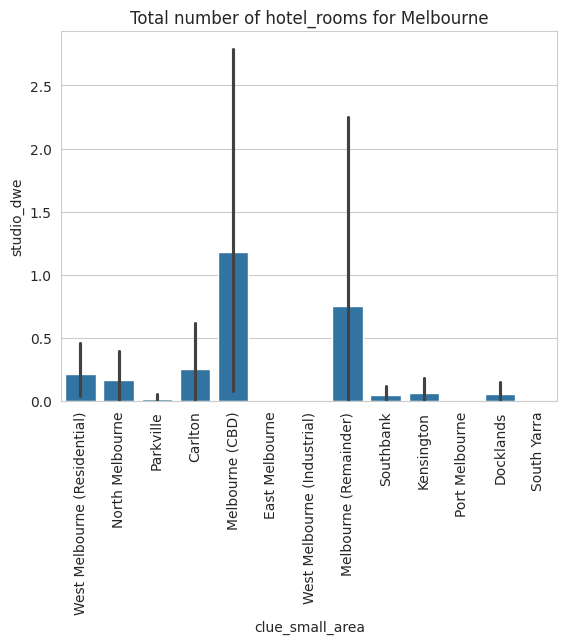

In [ ]:
dev_mon(develop_monitor1)

In [ ]:
def dev_mon(data):
    '''
      to visualise the resi_dwellings data
    '''
    ax = sns.boxplot(
    y='resi_dwellings',
    x = 'clue_small_area',
    data = develop_monitor1

        )
    warnings.filterwarnings('ignore')
    sns.set_style("whitegrid")
    plt.xticks(rotation =90)
    plt.title('Total number of resi_dwellings for Melbourne')
    plt.show()


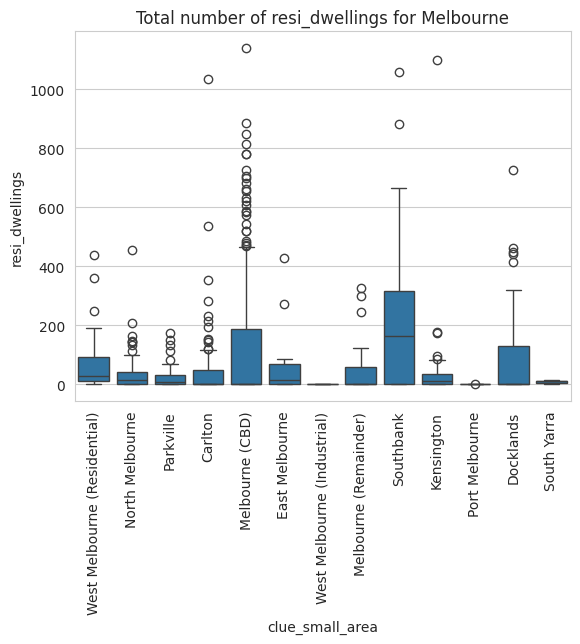

In [ ]:
dev_mon(develop_monitor1)

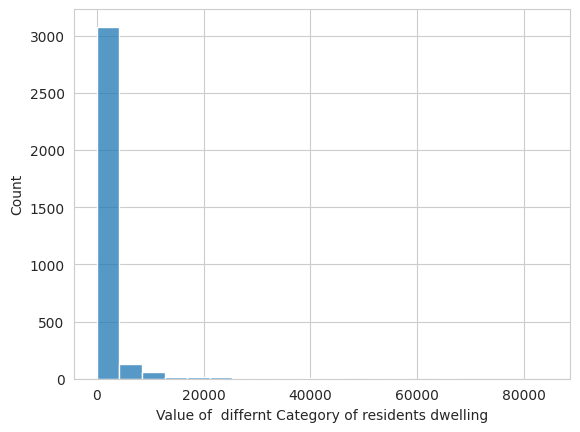

<Figure size 1000x1000 with 0 Axes>

In [ ]:
sns.histplot(dataset2.Value,bins=20)
plt.xlabel("Value of  differnt Category of residents dwelling")
plt.figure(figsize=(10,10))
plt.show()

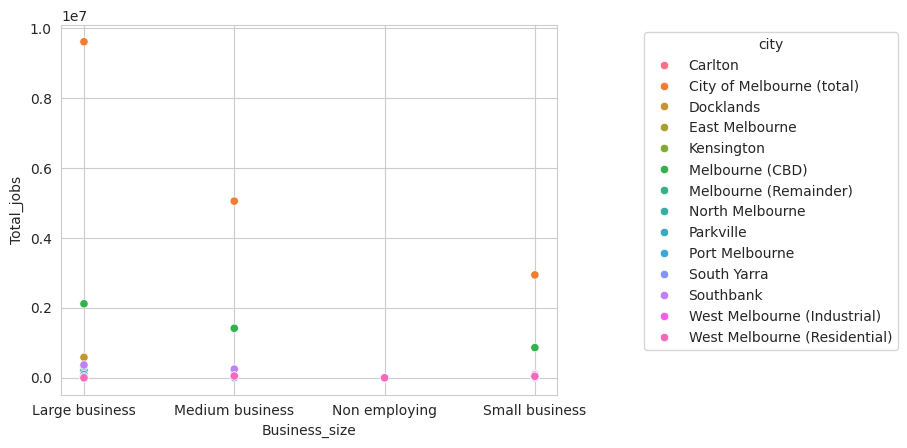

In [ ]:
p = sns.scatterplot(data=job_business,x="Business_size", y="Total_jobs", hue="city", legend=True )
sns.move_legend(p, "upper right", bbox_to_anchor=(1.7, 1))

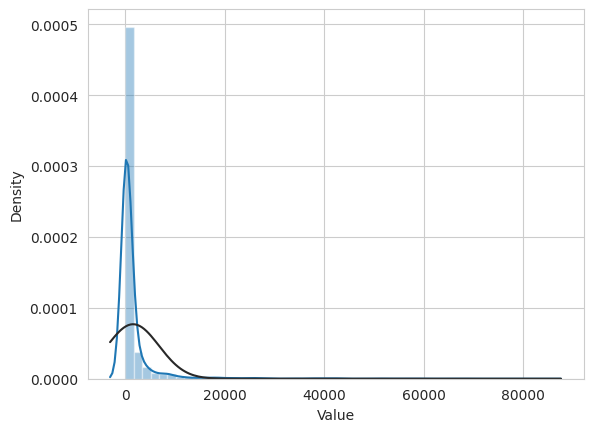

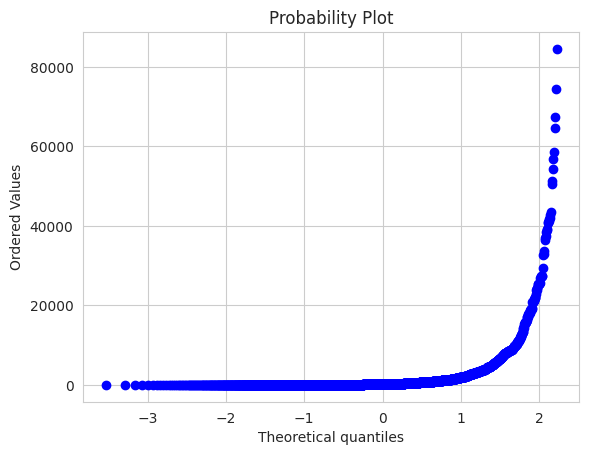

In [ ]:
sns.distplot(dataset2['Value'], fit=norm)
fig = plt.figure()
prob = stats.probplot(dataset2['Value'], plot=plt)

<Axes: xlabel='Total_jobs', ylabel='Count'>

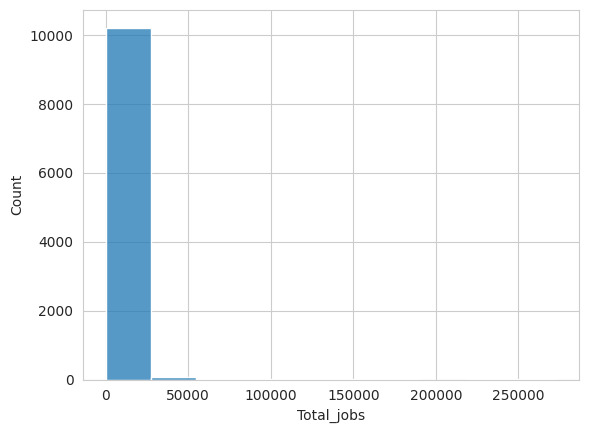

In [ ]:

sns.histplot(jobs_data.Total_jobs, bins=10)

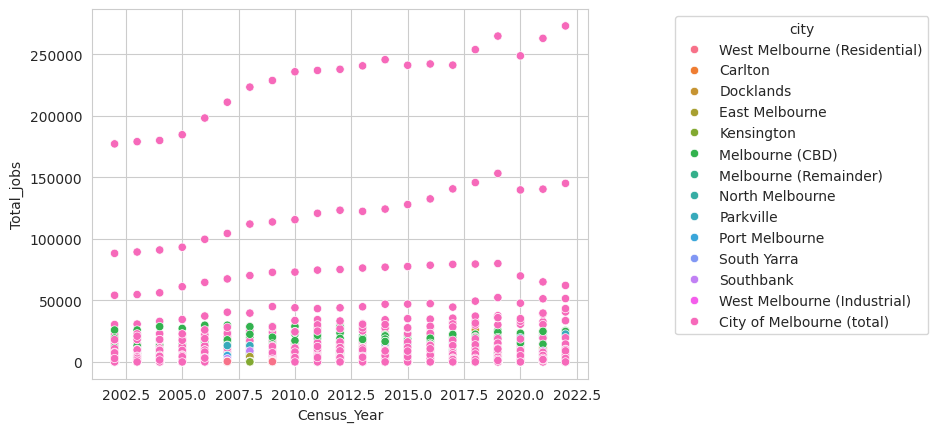

In [ ]:
p = sns.scatterplot(data=jobs_data,x="Census_Year", y="Total_jobs", hue="city", legend=True )
sns.move_legend(p, "upper right", bbox_to_anchor=(1.7, 1))


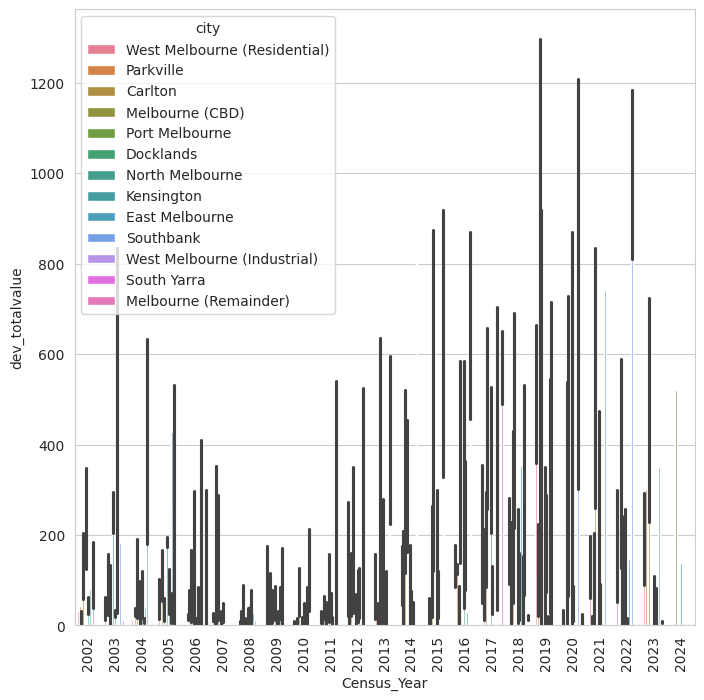

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(data= develop_monitor, y="dev_totalvalue", x="Census_Year", hue="city")
plt.xticks(rotation=90)

plt.show()


FInal dataset

In [ ]:
Jobs_business = jobs_data.groupby(['city','Census_Year']).sum()
Jobs_business =Jobs_business.reset_index()
Jobs_business.head(2)

,city,Census_Year,Business_size,Total_jobs
0,Carlton,2002,Non employingSmall businessNon employingSmall ...,14051.0
1,Carlton,2003,Non employingMedium businessMedium businessMed...,15689.0


In [ ]:
# First merge develop_monitor and resident on 'Census_Year' column
merged_df = pd.merge(develop_monitor, resident, on="Census_Year", how="left")

# Then merge the result with jobs_data on 'Census_Year' and 'city' columns
merged_df = pd.merge(merged_df, jobs_data, on=["Census_Year", "city"], how="left")

# Display the merged DataFrame
print(merged_df)


         Census_Year                          city  dev_totalvalue  \
0               2012  West Melbourne (Residential)              20   
1               2012  West Melbourne (Residential)              20   
2               2012  West Melbourne (Residential)              20   
3               2012  West Melbourne (Residential)              20   
4               2012  West Melbourne (Residential)              20   
...              ...                           ...             ...   
6037509         2023               Melbourne (CBD)               0   
6037510         2023  West Melbourne (Residential)             344   
6037511         2024               Melbourne (CBD)             521   
6037512         2024  West Melbourne (Residential)               0   
6037513         2024         Melbourne (Remainder)               0   

        Sub_Category  Value    Business_size  Total_jobs  
0                NaN    NaN   Small business       265.0  
1                NaN    NaN  Medium busin